## LEAD SCORING CASE STUDY

                           - By Durgesh Nikam

## Problem Statment

X Education, an online course provider, attracts industry professionals through various marketing channels like websites and search engines. When interested visitors fill out a form, they are classified as leads. Despite acquiring many leads, only 30% get converted, leading to an inefficient process. To improve conversion rates, the company aims to identify 'Hot Leads'—those with the highest potential to convert—allowing the sales team to focus their efforts more effectively and improve overall lead conversion. The goal is to optimize the middle stage of the funnel by nurturing high-potential leads.


### Goals and Objectives

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## Steps Followed

- Importing  the data and inspecting the data frame 
- Data cleaning 
- Data visualization
- Data Preprocessing 
- Data Modeling 
- Data Evaluation
- Optimal cut Off selection
- Prediction on the test set 


## Import All the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

# Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step1 : Data cleaning 

## Handling null values

In [6]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
null_col=df.isnull().mean()*100
null_col=null_col[null_col.values>40.0]
(null_col)

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

Column 'Prospect ID' and 'Lead Number' are of no use dropping both the columns

In [8]:
df.drop(columns=['Prospect ID' ,'Lead Number'],inplace=True)

Dropping the columns with null values percentage greater than 40

In [9]:
missing_percentage = df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage <40].index
df = df[columns_to_drop]

In [10]:
df.shape

(9240, 30)

In [11]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

Dropping the columns containing with one unique value 

In [12]:
df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [13]:
df.shape

(9240, 25)

Handling categorical values with unique values less than 40

In [14]:
categorical_all = [col for col in df.columns 
                    if df[col].nunique() < 40 and df[col].dtype == 'object']
df[categorical_all].nunique()

Lead Origin                                       5
Lead Source                                      21
Do Not Email                                      2
Do Not Call                                       2
Last Activity                                    17
Country                                          38
Specialization                                   19
How did you hear about X Education               10
What is your current occupation                   6
What matters most to you in choosing a course     3
Search                                            2
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
Tags                                             26
Lead Profile                                      6
City                                              7
A free copy 

Handling columns with nunique values equal to 2

In [15]:
categorical_cols = [col for col in df.columns 
                    if df[col].nunique() == 2 and df[col].dtype == 'object']
for i in categorical_cols:
    print(df[i].value_counts())
    print('-'*100)

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Search
No     9226
Yes      14
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
X Education Forums
No     9239
Yes       1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Newspaper
No     9239
Yes       1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Digital Adverti

- Here columns with nuinque value equals to two has imbalance input which can bais the model prediction therefore it is better to drop all the columns

In [16]:
df = df.drop(columns=categorical_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9103 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9103 non-null   float64
 6   Last Activity                                  9137 non-null   object 
 7   Country                                        6779 non-null   object 
 8   Specialization                                 7802 non-null   object 
 9   How did you hear about X Education             7033 

In [17]:
## Analyzing city column
df['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

- Here maximum leads are from mumbai other than this it is difficult to get insights from this column so dropping the column

In [18]:
## Anlayzing Country column
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

- Maximum Leads are from India there not much use of country column

In [19]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

- In this column maximum number of inputs are 'Select' so this column information is of no use we can drop it.

In [20]:
df.drop(columns=['City','Country','How did you hear about X Education'],inplace=True,axis=1)
df.shape

(9240, 13)

## Analyzing Categorical columns containing 'Select' as input

In [21]:
for i in categorical_all:
    if i in df.columns:
        if 'Select' in df[i].value_counts():
           print(df[i].value_counts())
           print('-' * 100)

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Lead Profile
Select                         4146
Potential L

- In 'Lead Profile' column maximum number of inputs are 'Select' therefore this column will be of no use better to drop this column

In [22]:
df.drop(columns='Lead Profile',inplace =True, axis=1)
df.shape

(9240, 12)

In [23]:
## Checking the percentage of null values in each column again
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Last Notable Activity                             0.000000
dtype: float64

In [24]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

- In this column almost every lead went for single option 'Better career Prospects' so it is not going to give any thing useful

In [25]:
df.drop(columns='What matters most to you in choosing a course',inplace=True,axis=1)
df.shape

(9240, 11)

In [26]:
df.isnull().mean()*100

Lead Origin                         0.000000
Lead Source                         0.389610
Converted                           0.000000
TotalVisits                         1.482684
Total Time Spent on Website         0.000000
Page Views Per Visit                1.482684
Last Activity                       1.114719
Specialization                     15.562771
What is your current occupation    29.112554
Tags                               36.287879
Last Notable Activity               0.000000
dtype: float64

- Tags column around 36% values are missing it is better to drop the column 

In [27]:
df.drop(columns='Tags',inplace=True,axis=1)
df.isnull().mean()*100

Lead Origin                         0.000000
Lead Source                         0.389610
Converted                           0.000000
TotalVisits                         1.482684
Total Time Spent on Website         0.000000
Page Views Per Visit                1.482684
Last Activity                       1.114719
Specialization                     15.562771
What is your current occupation    29.112554
Last Notable Activity               0.000000
dtype: float64

- In column 'Specialization' and 'What is your current occupation' 15 and 29 percent of null values respecting as we have already drop so many columns and lost data instead of dropping column it is better to drop rows containing null values 

In [28]:
# Drop the null values rows in the column 'Specialization'
df = df[~pd.isnull(df['Specialization'])]

In [29]:
# Drop the null values rows in the column 'What is your current occupation'
df = df[~pd.isnull(df['What is your current occupation'])]

In [30]:
# Drop the null values rows in the column 'Lead Source'
df = df[~pd.isnull(df['Lead Source'])]

In [31]:
# Drop the null values rows in the column 'Last Activity'
df = df[~pd.isnull(df['Last Activity'])]

In [32]:
# Drop the null values rows in the column 'TotalVisits'
df = df[~pd.isnull(df['TotalVisits'])]
df.isnull().mean()*100

Lead Origin                        0.0
Lead Source                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
Last Notable Activity              0.0
dtype: float64

In [33]:
df.shape

(6373, 10)

In [34]:
categorical_col=[]
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('-' * 100)
        categorical_col.append(i)
print(categorical_col)

Lead Origin
Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Last Activity
Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          427
Converted to Lea

- Here in all the categorical column we can observe some of the inputs are there with counts very small which is not going to helpful in creating model

In [35]:
for i in categorical_col:
    value_counts=df[i].value_counts()
    to_drop = value_counts[value_counts <= 15].index  
    df = df[~df[i].isin(to_drop)]


In [36]:
for i in categorical_col:
    print(df[i].value_counts())
    print('-' * 100)      

Lead Origin
Landing Page Submission    3588
API                        2115
Lead Add Form               570
Lead Import                  27
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Lead Source
Google              2025
Direct Traffic      1860
Olark Chat           886
Organic Search       859
Reference            438
Welingak Website     129
Referral Sites        75
Facebook              28
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Last Activity
Email Opened                 2428
SMS Sent                     2185
Olark Chat Conversation       425
Page Visited on Website       418
Converted to Lead             292
Email Link Clicked            177
Email Bounced                 175
Form Submitted on Website      80
Unreachable                    70
Unsubscribed                   40
Had a Phone Conversation       10
Name: 

In [37]:
df.shape

(6300, 10)

In [38]:
## Percentage of data left after deleting rows containing null values
(6300/9240)*100

68.18181818181817

## Handling Outliers 

In [39]:
numeric_all = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
df[numeric_all].head()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
0,0.0,0.0,0
1,5.0,2.5,674
2,2.0,2.0,1532
3,1.0,1.0,305
4,2.0,1.0,1428


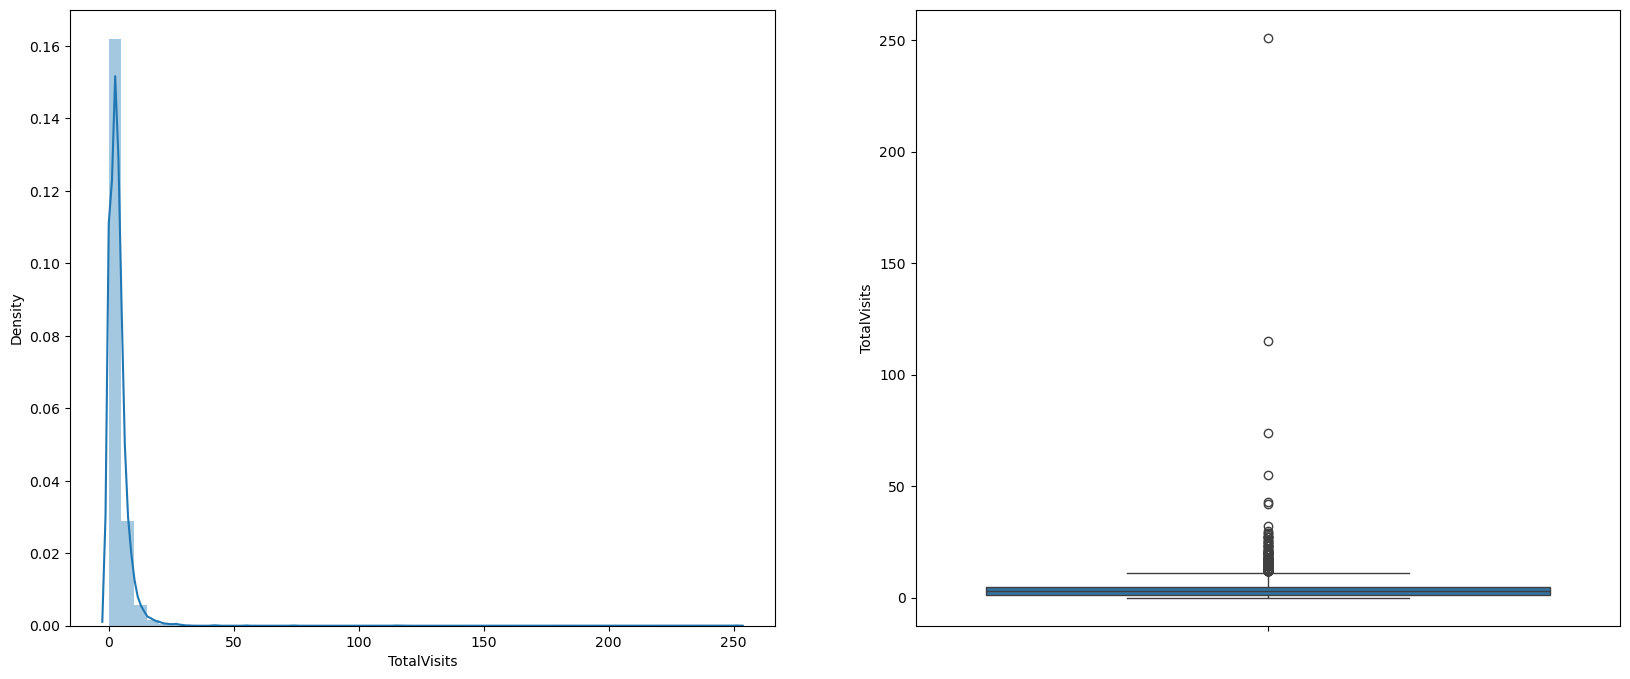

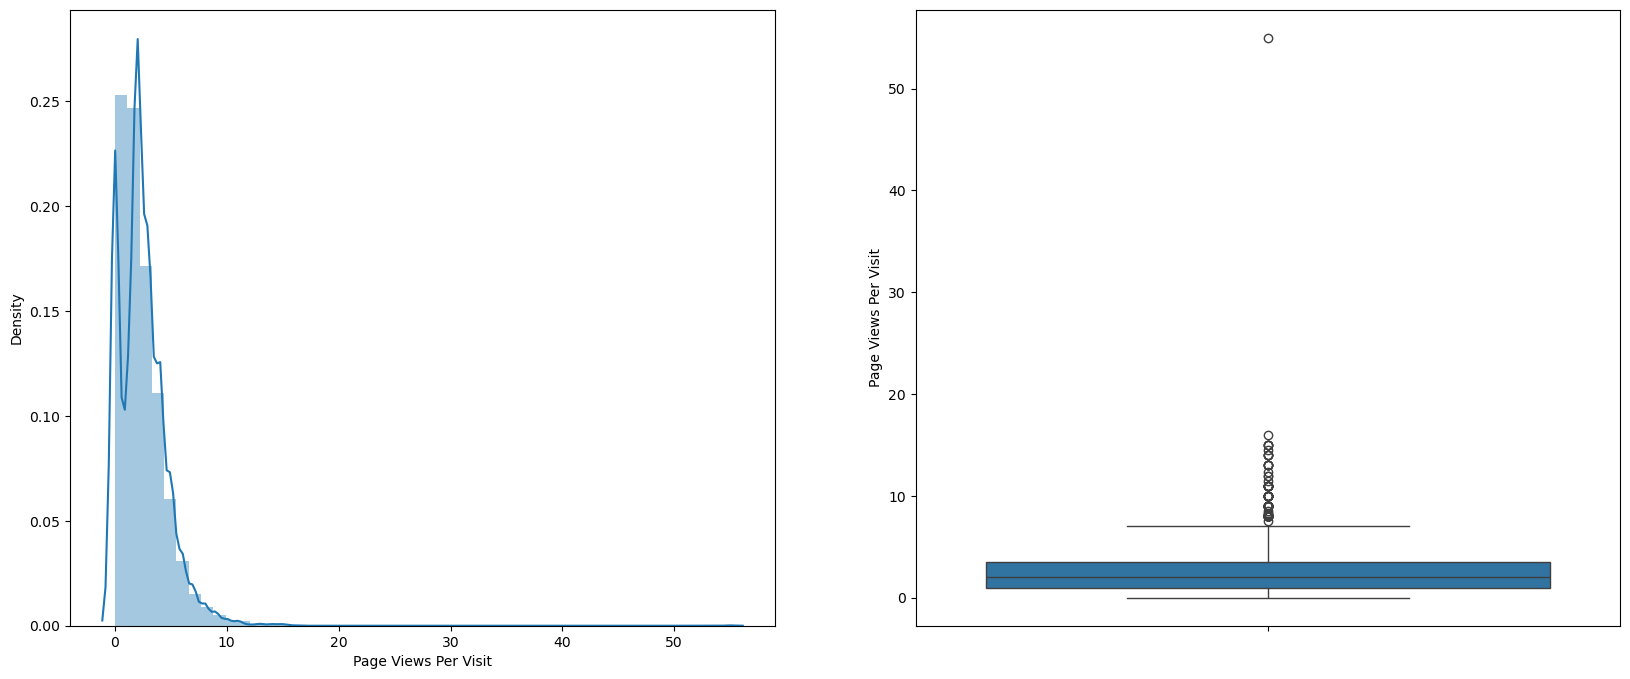

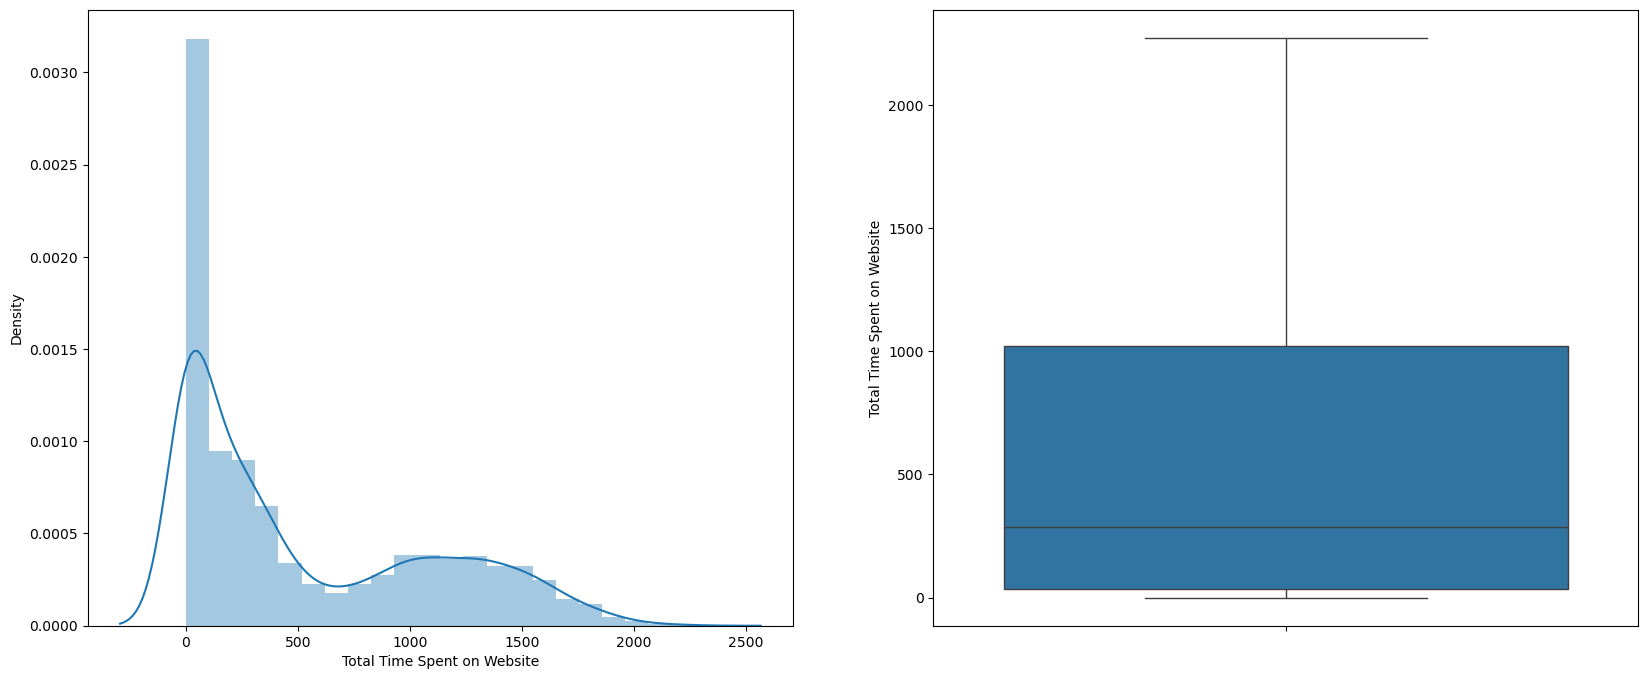

In [40]:
for i in numeric_all:
    plt.subplots(1,2 ,figsize = (20,8))
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    sns.boxplot(df[i])
    plt.show()

18.74546593360435
-11.528957997096416


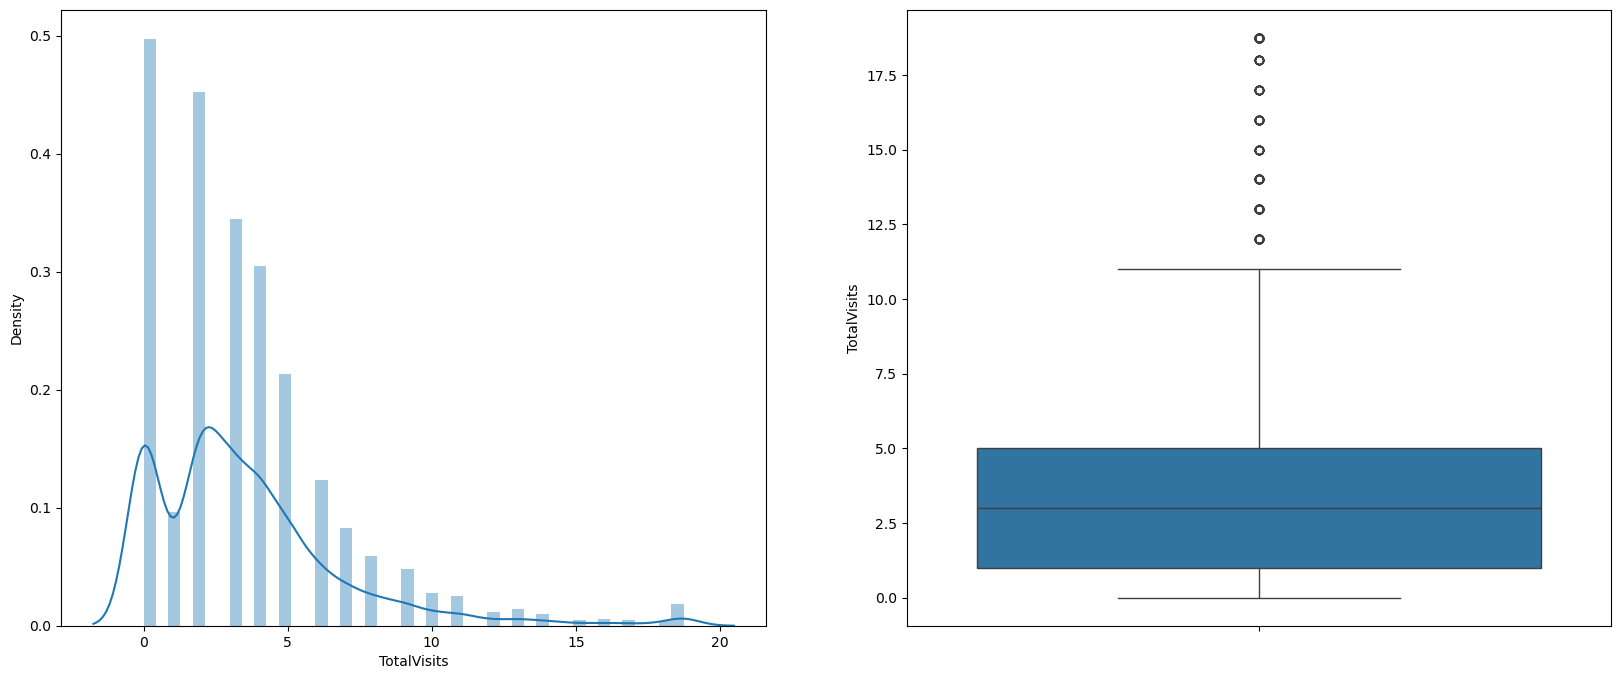

8.97788238570028
-4.024269687287582


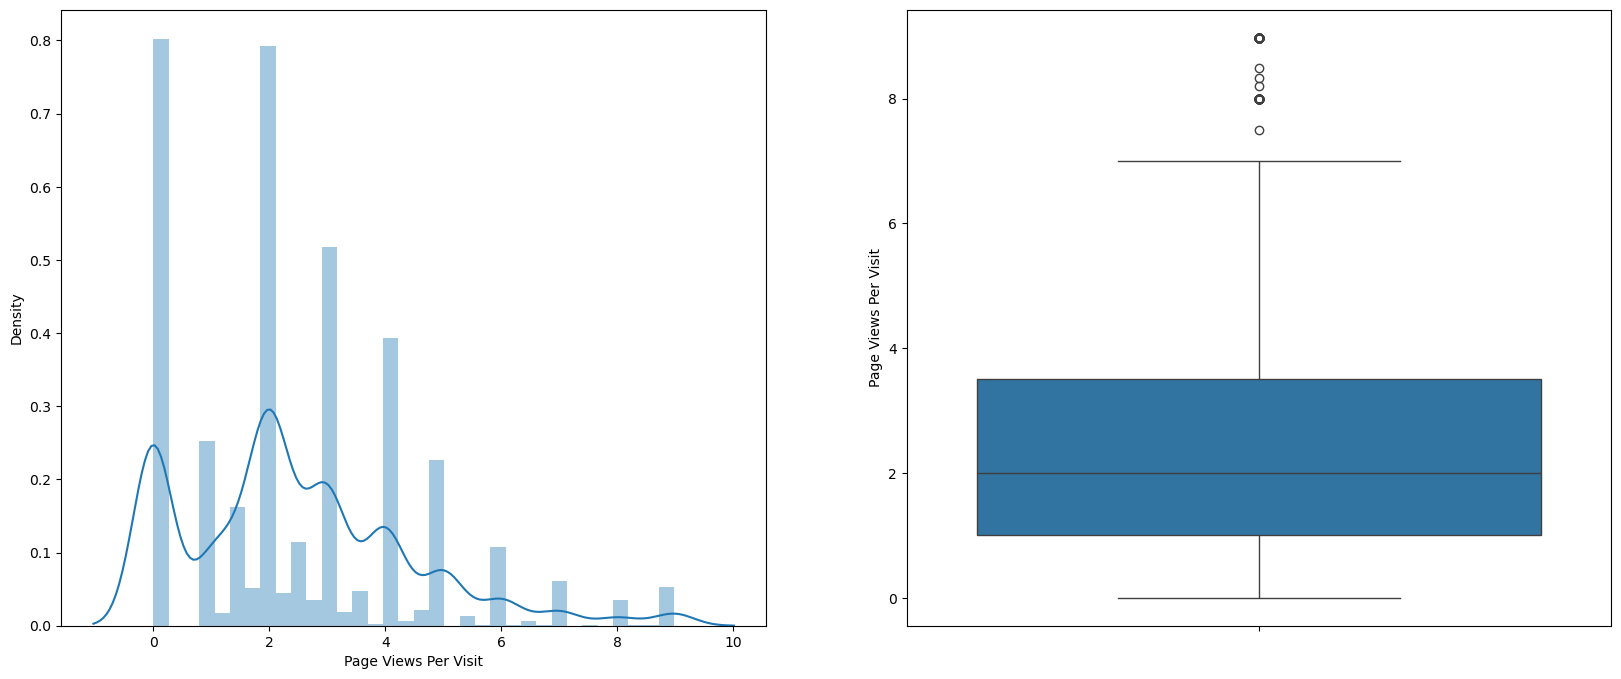

2227.050889318308
-1160.2134290008478


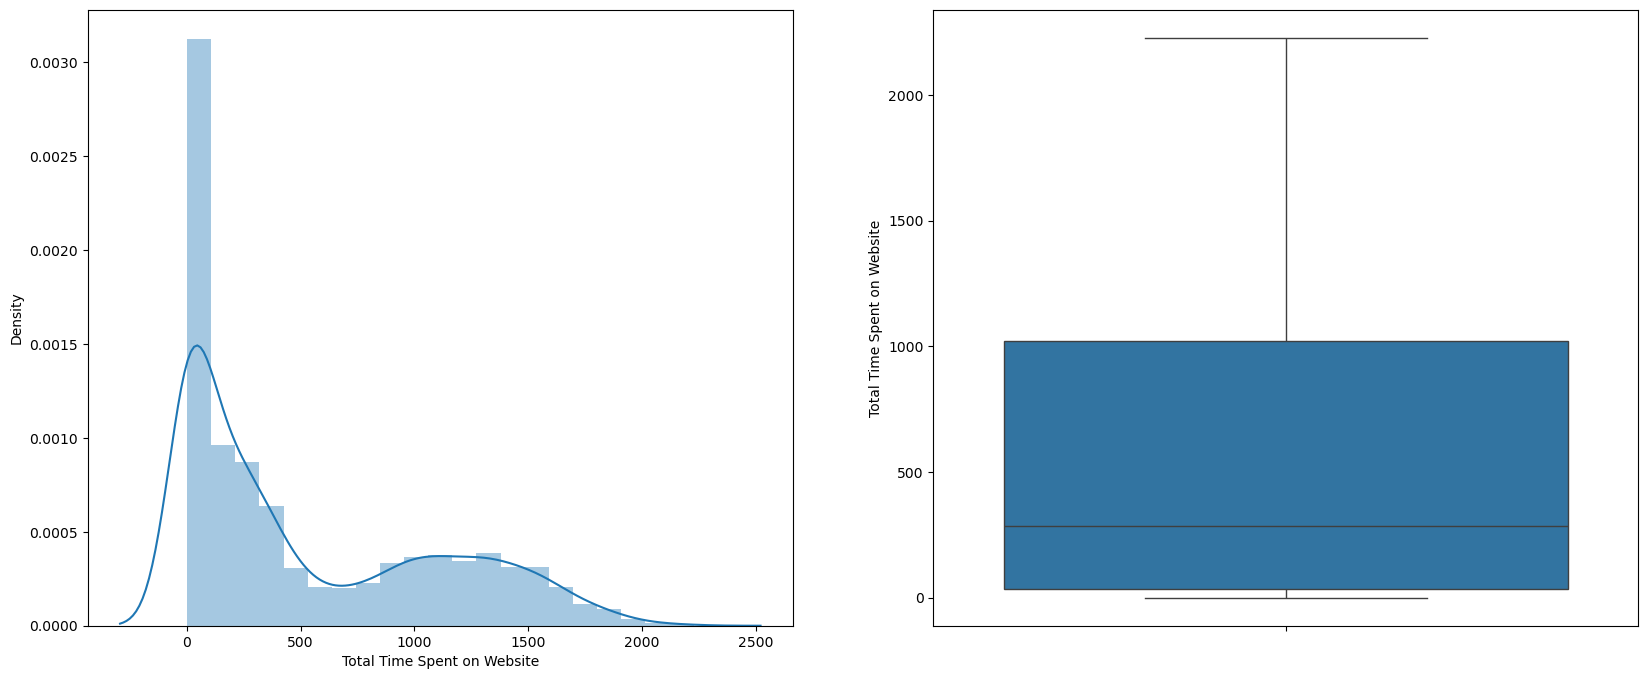

In [41]:
for i in numeric_all:
    upper_limit=df[i].mean()+3*df[i].std()
    lower_limit=df[i].mean()-3*df[i].std()
    print(upper_limit)
    print(lower_limit)
    df.loc[df[i]>upper_limit,i]=upper_limit
    df.loc[df[i]<lower_limit,i]=lower_limit
    plt.subplots(1,2 ,figsize = (20,8))
    plt.subplot(121)
    sns.distplot(df[i])
    plt.subplot(122)
    sns.boxplot(df[i])
    plt.show()

## Data Visualization

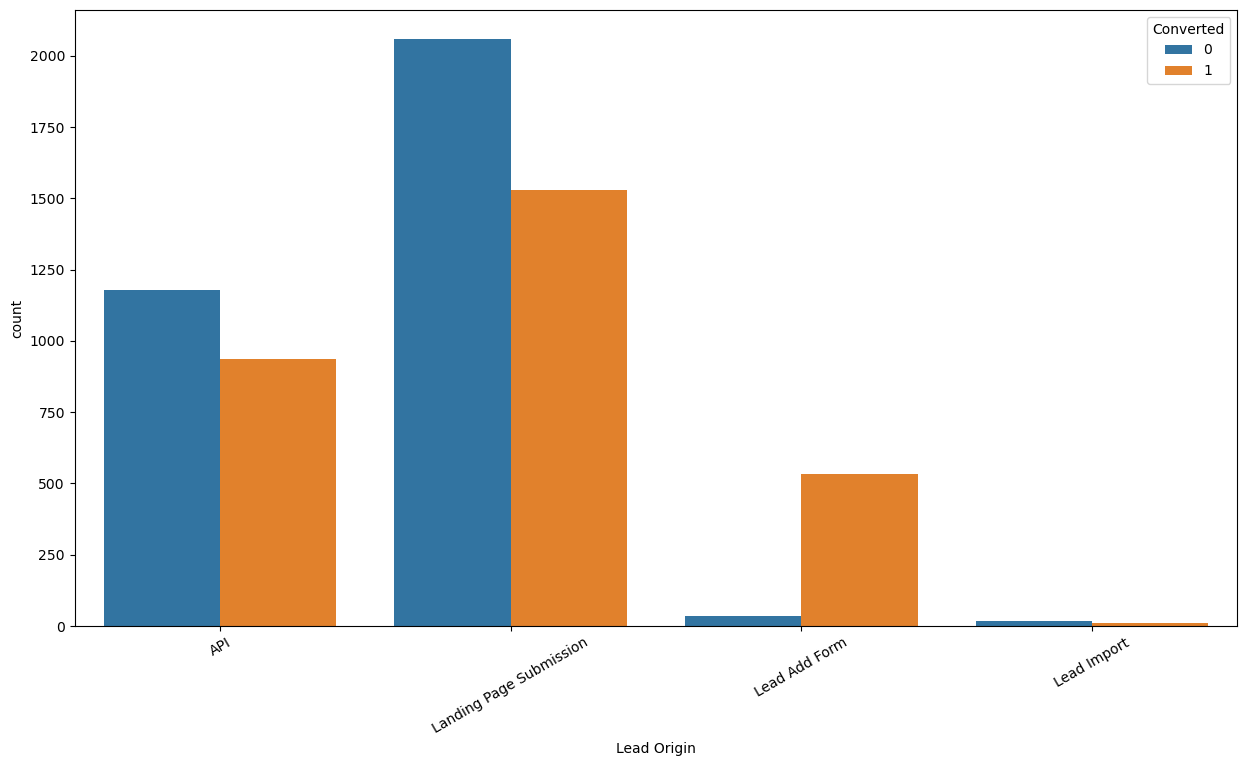

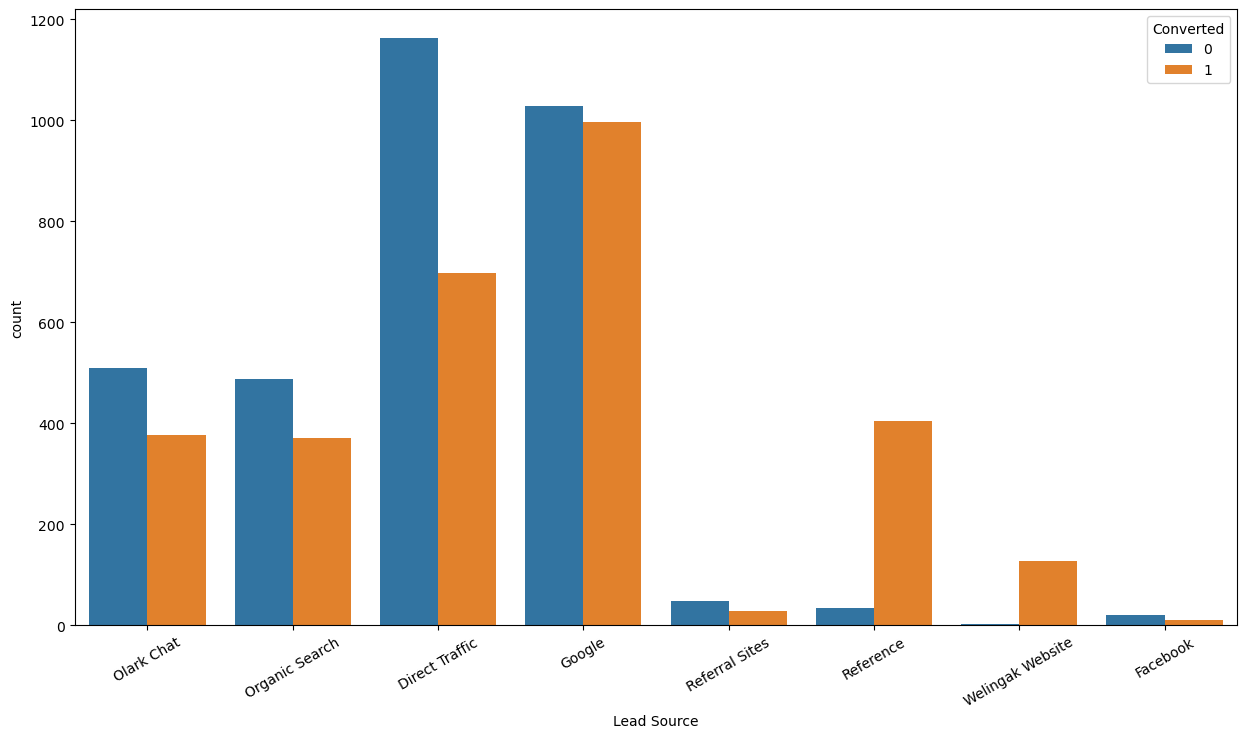

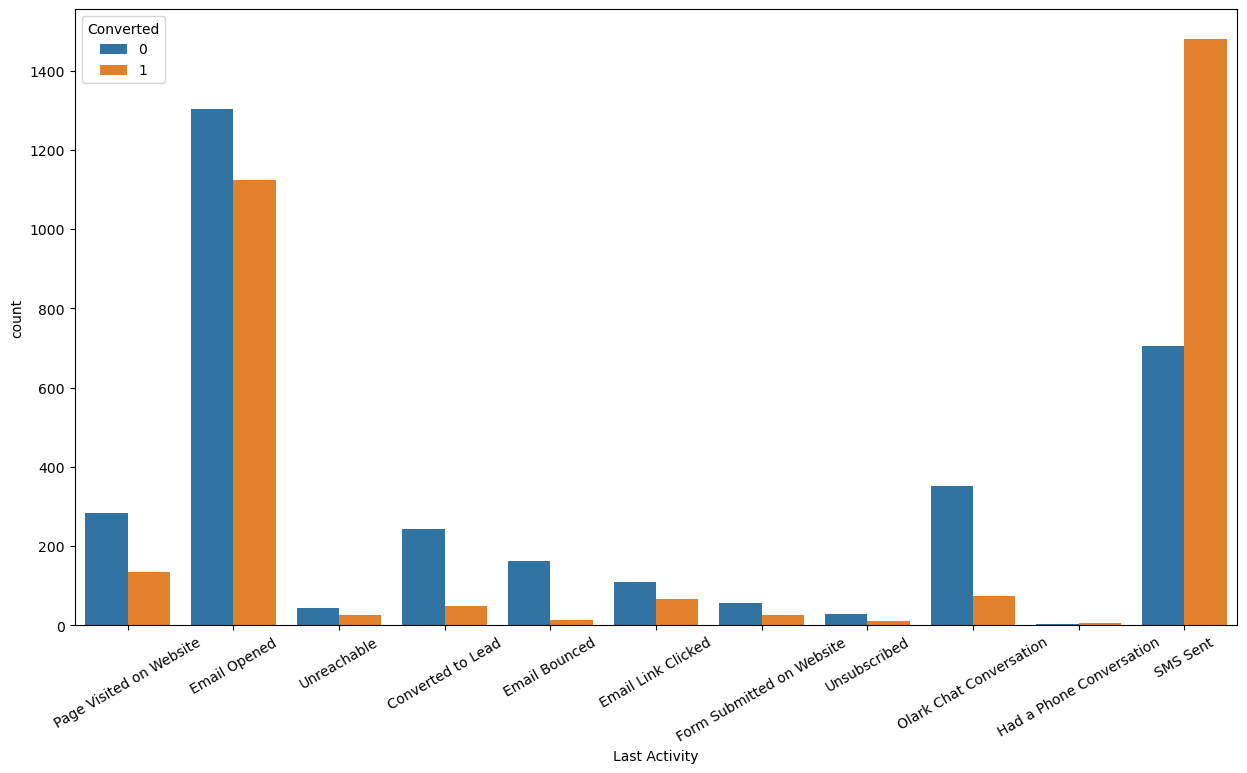

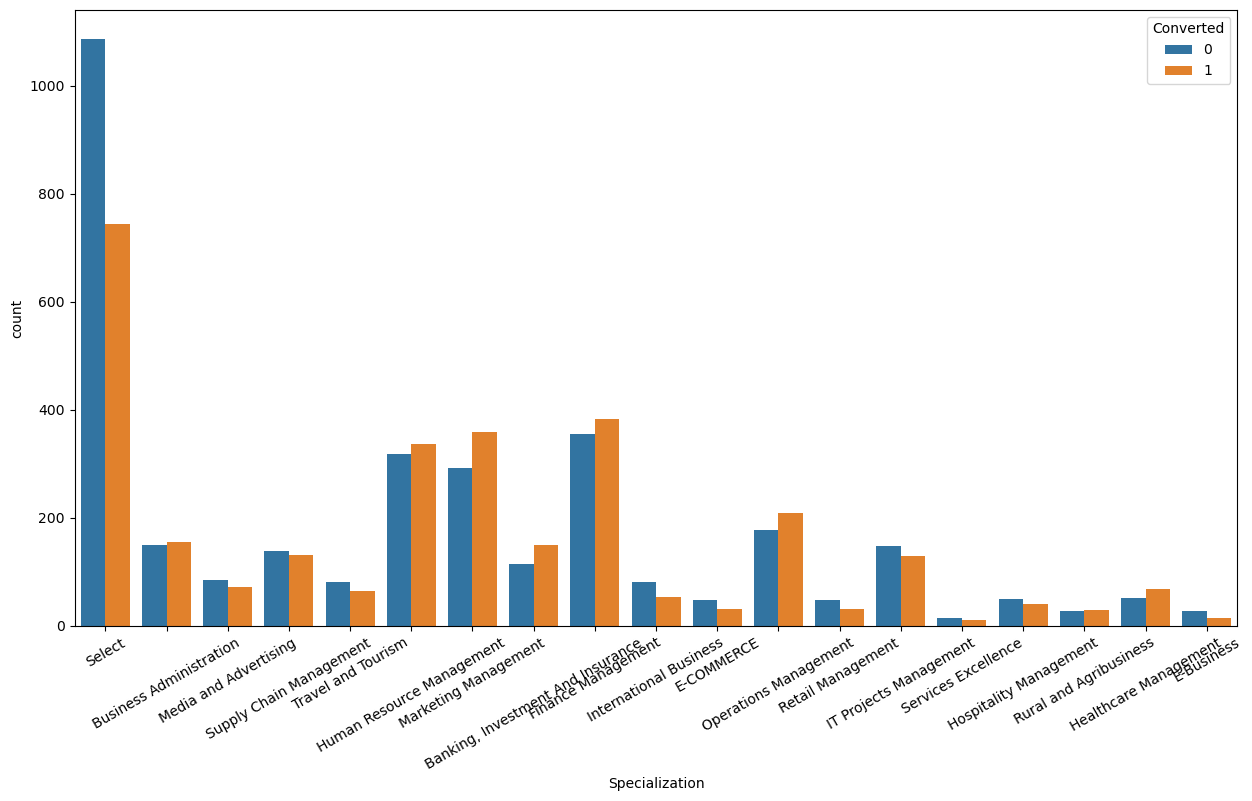

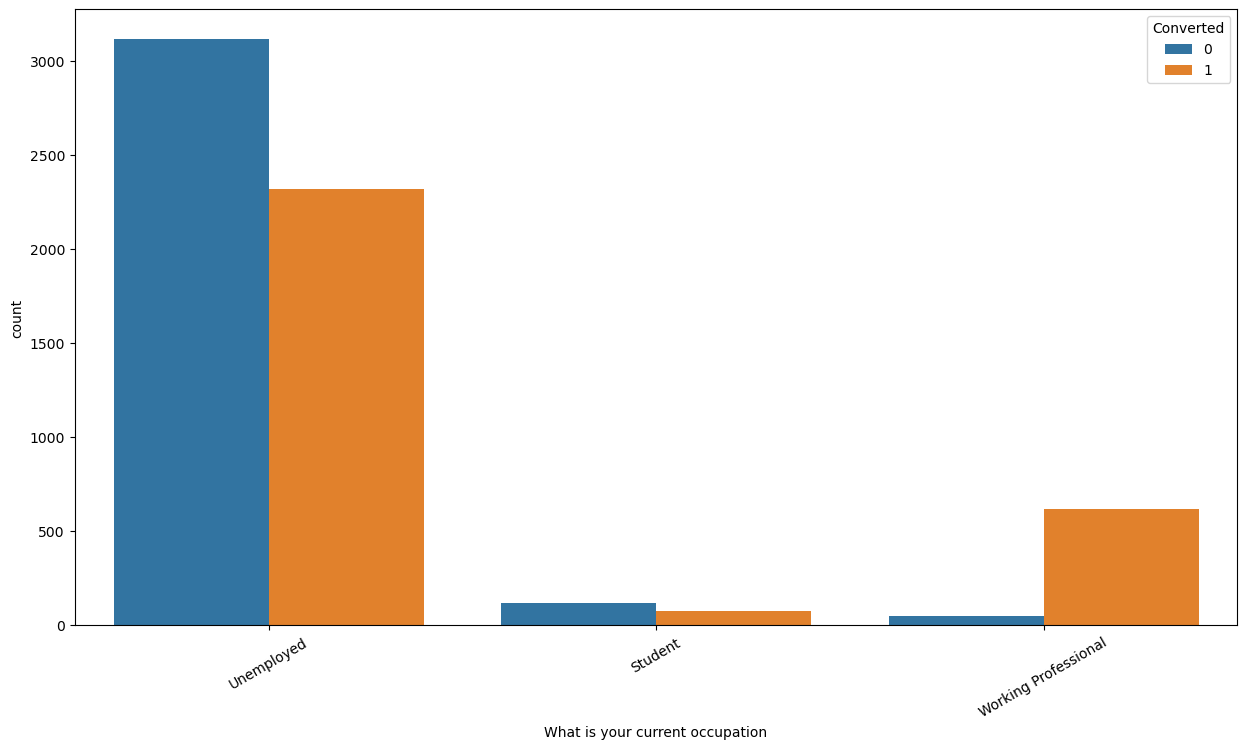

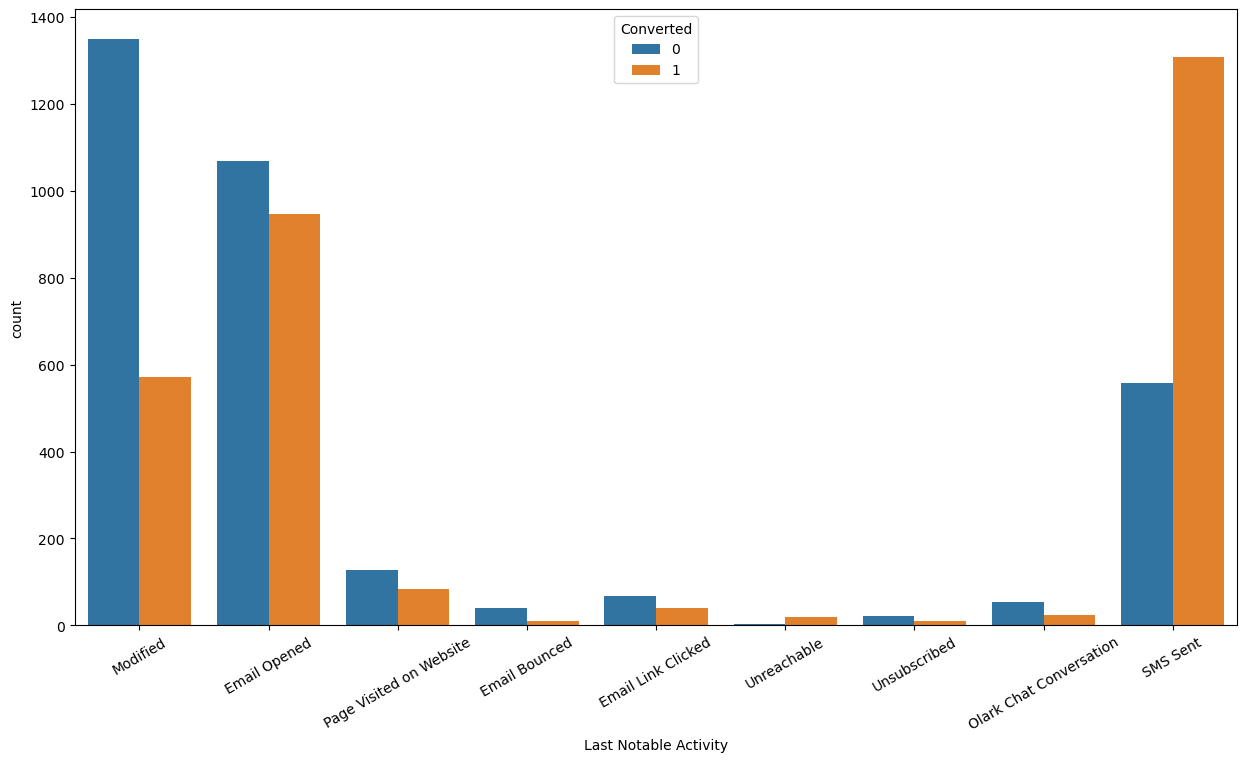

In [42]:
col=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Last Notable Activity'] 
for i in col:  
     plt.figure(figsize=(15,8)) 
     sns.countplot(data=df,x=i,hue='Converted')
     plt.xticks(rotation=30)
     plt.show()

- Lead Origin from a Lead Add Form has high chances of conversion
- Lead Source from Google ,Reference and Welingak Website has shown positive response for the maximum number of times
- Last Activity SMS sent and Email Opened are likily more interested
- Lead with specialization Business Administration, Human Resource Management ,Marketing Management, Banking, Investment and Insurance, Finance and operation management are the hot leads.
- Working Professional are highly intersted in getting enrolled 

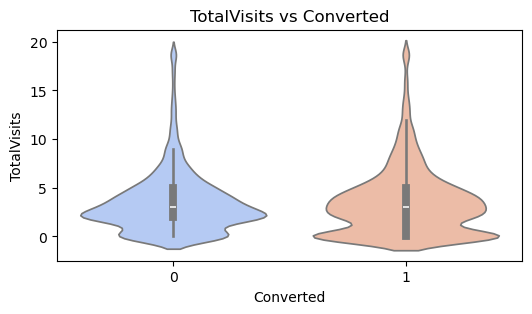

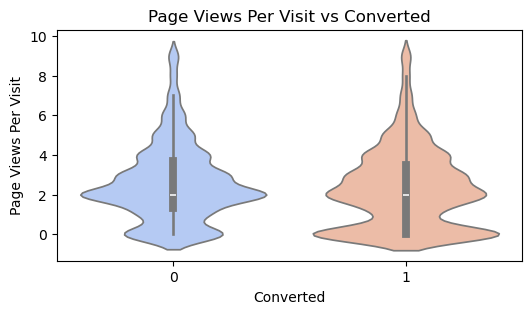

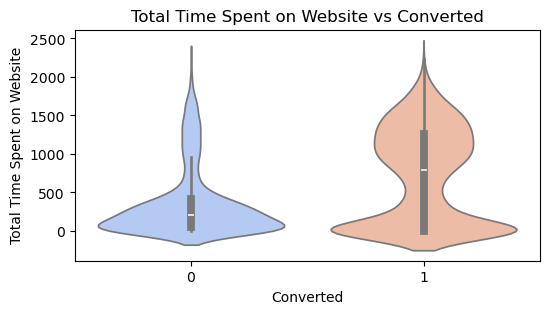

In [43]:
numeric_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.violinplot(x='Converted', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Converted')
    plt.show()

- As 'Page visit per view' , 'Total time spent on website' ,'Total visits' increases chance of conversion increases

## Step 2: Data Processing

## Dummy Variable

In [44]:
# Remove the 'Specialization' column from the list of categorical columns
categorical_filter = [col for col in categorical_col if col != 'Specialization']
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[categorical_filter], drop_first=True,dtype=int)
# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [45]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization',dtype=int)
dummy_spl = dummy_spl.drop(columns='Specialization_Select', axis=1)
df = pd.concat([df, dummy_spl], axis = 1)

In [46]:
# Dropping the variables for which the dummy variables have been created
df = df.drop(df[categorical_col],axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6300 non-null   int64  
 1   TotalVisits                                           6300 non-null   float64
 2   Total Time Spent on Website                           6300 non-null   float64
 3   Page Views Per Visit                                  6300 non-null   float64
 4   Lead Origin_Landing Page Submission                   6300 non-null   int32  
 5   Lead Origin_Lead Add Form                             6300 non-null   int32  
 6   Lead Origin_Lead Import                               6300 non-null   int32  
 7   Lead Source_Facebook                                  6300 non-null   int32  
 8   Lead Source_Google                                    6300 non-

## Test-Train Split

In [48]:
# Put all the feature variables in X
X = df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
y=df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Spliting the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4410, 51)
y_train Size (4410,)


In [52]:
#lets check the shape
print("X_test Size", X_test.shape)
print("y_test Size", y_test.shape)

X_test Size (1890, 51)
y_test Size (1890,)


## Scaling 

Handling numeric columns converting the values range of the columns

In [53]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
643,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6844,0.213385,0.151770,0.445539,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7422,0.266731,0.073640,0.278462,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3103,0.480116,0.081273,0.501232,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [54]:
X_train.shape

(4410, 51)

## Step 3 : Model Building

There are many features it is not possible to design model with this many feature using RFE to select the features for the building from the pool of variables

In [55]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

In [56]:
# Creating an RFE object to select 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15)
# Fitting the RFE model
rfe = rfe.fit(X_train, y_train)

In [57]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 16),
 ('Last Activity_Unsubscribed', False, 22),


In [58]:
# Putting all the columns selected by RFE in the variable 'support_col'
support_col = X_train.columns[rfe.support_]

In [59]:
# Select only the columns selected by RFE
X_train = X_train[support_col]
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model 1

In [60]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4410
Model:                            GLM   Df Residuals:                     4394
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2006.5
Date:                Wed, 18 Sep 2024   Deviance:                       4013.1
Time:                        19:00:19   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8563      0.147    -19.428      0.000      -3.144      -2.568
TotalVisits                                              2.0147      0.296      6.803      0.000       1.434       2.595
Total Time Spent on Website                              4.6275      0.190     24.366      0.000       4.255       5.000
Page Views Per Visit                                    -1.0400      0.269     -3.866      0.000      -1.567      -0.513
Lead Origin_Lead Add Form                                3.5483      0.231     15.376      0.000       3.096       4.001
Lead Origin_Lead Import                                  1.1796      0.513      2.301      0.021       0.175       2.184
Lead Source_Olark Chat                                   1.6778      0.149     11.293      0.000       1.387       1.969
Lead Source_Welingak Website                             2.7305      1.028      2.655      0.008       0.715       4.746
Last Activity_Email Bounced                             -1.5079      0.399     -3.779      0.000      -2.290      -0.726
Last Activity_Email Opened                               0.7167      0.120      5.996      0.000       0.482       0.951
Last Activity_Had a Phone Conversation                   1.0681      0.841      1.270      0.204      -0.580       2.716
Last Activity_Olark Chat Conversation                   -0.6619      0.210     -3.153      0.002      -1.073      -0.250
Last Activity_SMS Sent                                   0.8583      0.204      4.210      0.000       0.459       1.258
What is your current occupation_Working Professional     2.4747      0.186     13.274      0.000       2.109       2.840
Last Notable Activity_SMS Sent                           0.8903      0.189      4.705      0.000       0.519       1.261
Last Notable Activity_Unreachable                        4.1254      1.077      3.830      0.000       2.014       6.236
========================================================================================================================
"""

There are features with p value greater than 0.05 before dropping those check the VIF 

## Checking VIF

In [61]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_SMS Sent,8.55
13,Last Notable Activity_SMS Sent,7.20
2,Page Views Per Visit,5.29
0,TotalVisits,3.88
8,Last Activity_Email Opened,2.39
1,Total Time Spent on Website,2.23
3,Lead Origin_Lead Add Form,1.77
5,Lead Source_Olark Chat,1.62
10,Last Activity_Olark Chat Conversation,1.37
6,Lead Source_Welingak Website,1.33


- VIF of the column 'Last Activity_SMS Sent' is greater than 5 dropping the column 

In [62]:
X_train.drop('Last Activity_SMS Sent', axis = 1, inplace = True)

## Model 2

In [63]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4410
Model:                            GLM   Df Residuals:                     4395
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.3
Date:                Wed, 18 Sep 2024   Deviance:                       4030.6
Time:                        19:00:20   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6617      0.136    -19.533      0.000      -2.929      -2.395
TotalVisits                                              1.9086      0.293      6.509      0.000       1.334       2.483
Total Time Spent on Website                              4.6314      0.189     24.450      0.000       4.260       5.003
Page Views Per Visit                                    -0.9388      0.267     -3.516      0.000      -1.462      -0.416
Lead Origin_Lead Add Form                                3.6275      0.230     15.738      0.000       3.176       4.079
Lead Origin_Lead Import                                  1.3171      0.517      2.550      0.011       0.305       2.329
Lead Source_Olark Chat                                   1.6968      0.148     11.449      0.000       1.406       1.987
Lead Source_Welingak Website                             2.7830      1.028      2.706      0.007       0.767       4.799
Last Activity_Email Bounced                             -1.7108      0.395     -4.326      0.000      -2.486      -0.936
Last Activity_Email Opened                               0.5043      0.106      4.755      0.000       0.296       0.712
Last Activity_Had a Phone Conversation                   0.8612      0.841      1.024      0.306      -0.786       2.509
Last Activity_Olark Chat Conversation                   -0.8725      0.203     -4.303      0.000      -1.270      -0.475
What is your current occupation_Working Professional     2.4858      0.186     13.357      0.000       2.121       2.851
Last Notable Activity_SMS Sent                           1.5360      0.114     13.491      0.000       1.313       1.759
Last Notable Activity_Unreachable                        3.9164      1.076      3.641      0.000       1.808       6.025
========================================================================================================================
"""

## Checking VIF

In [64]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.05
0,TotalVisits,3.88
1,Total Time Spent on Website,2.19
8,Last Activity_Email Opened,2.18
12,Last Notable Activity_SMS Sent,2.04
3,Lead Origin_Lead Add Form,1.67
5,Lead Source_Olark Chat,1.55
6,Lead Source_Welingak Website,1.33
10,Last Activity_Olark Chat Conversation,1.33
11,What is your current occupation_Working Profes...,1.20


In [65]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

## Model 3

In [66]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4410
Model:                            GLM   Df Residuals:                     4396
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.6
Date:                Wed, 18 Sep 2024   Deviance:                       4043.1
Time:                        19:00:20   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3725
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8329      0.128    -22.078      0.000      -3.084      -2.581
TotalVisits                                              1.3850      0.252      5.500      0.000       0.891       1.879
Total Time Spent on Website                              4.6183      0.189     24.421      0.000       4.248       4.989
Lead Origin_Lead Add Form                                3.8272      0.224     17.104      0.000       3.389       4.266
Lead Origin_Lead Import                                  1.4819      0.515      2.878      0.004       0.473       2.491
Lead Source_Olark Chat                                   1.8962      0.138     13.769      0.000       1.626       2.166
Lead Source_Welingak Website                             2.7800      1.028      2.703      0.007       0.765       4.795
Last Activity_Email Bounced                             -1.6679      0.393     -4.243      0.000      -2.438      -0.897
Last Activity_Email Opened                               0.4687      0.105      4.454      0.000       0.262       0.675
Last Activity_Had a Phone Conversation                   0.8684      0.841      1.032      0.302      -0.780       2.517
Last Activity_Olark Chat Conversation                   -0.8903      0.203     -4.395      0.000      -1.287      -0.493
What is your current occupation_Working Professional     2.4825      0.186     13.359      0.000       2.118       2.847
Last Notable Activity_SMS Sent                           1.4868      0.113     13.215      0.000       1.266       1.707
Last Notable Activity_Unreachable                        3.8802      1.076      3.605      0.000       1.771       5.990
========================================================================================================================
"""

## Checking VIF

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.13
0,TotalVisits,2.12
7,Last Activity_Email Opened,1.91
11,Last Notable Activity_SMS Sent,1.81
2,Lead Origin_Lead Add Form,1.63
4,Lead Source_Olark Chat,1.47
5,Lead Source_Welingak Website,1.33
9,Last Activity_Olark Chat Conversation,1.30
10,What is your current occupation_Working Profes...,1.20
6,Last Activity_Email Bounced,1.03


- 'Last Activity_Had a Phone Conversation' is having p-value greater 0.05 

In [68]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

## Model 4

In [69]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4410
Model:                            GLM   Df Residuals:                     4397
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.1
Date:                Wed, 18 Sep 2024   Deviance:                       4044.2
Time:                        19:00:20   Pearson chi2:                 4.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3723
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8241      0.128    -22.078      0.000      -3.075      -2.573
TotalVisits                                              1.3851      0.252      5.501      0.000       0.892       1.879
Total Time Spent on Website                              4.6186      0.189     24.428      0.000       4.248       4.989
Lead Origin_Lead Add Form                                3.8306      0.224     17.118      0.000       3.392       4.269
Lead Origin_Lead Import                                  1.4805      0.515      2.876      0.004       0.472       2.489
Lead Source_Olark Chat                                   1.8952      0.138     13.764      0.000       1.625       2.165
Lead Source_Welingak Website                             2.7740      1.028      2.698      0.007       0.759       4.789
Last Activity_Email Bounced                             -1.6764      0.393     -4.266      0.000      -2.447      -0.906
Last Activity_Email Opened                               0.4600      0.105      4.388      0.000       0.255       0.665
Last Activity_Olark Chat Conversation                   -0.8984      0.202     -4.440      0.000      -1.295      -0.502
What is your current occupation_Working Professional     2.4800      0.186     13.348      0.000       2.116       2.844
Last Notable Activity_SMS Sent                           1.4781      0.112     13.184      0.000       1.258       1.698
Last Notable Activity_Unreachable                        3.8714      1.076      3.597      0.000       1.762       5.981
========================================================================================================================
"""

## Checking VIF

In [70]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.13
0,TotalVisits,2.11
7,Last Activity_Email Opened,1.91
10,Last Notable Activity_SMS Sent,1.81
2,Lead Origin_Lead Add Form,1.62
4,Lead Source_Olark Chat,1.47
5,Lead Source_Welingak Website,1.33
8,Last Activity_Olark Chat Conversation,1.30
9,What is your current occupation_Working Profes...,1.20
6,Last Activity_Email Bounced,1.03


P-value is less than 0.05 and VIF is less than 5 in all the features making the prediction using the features available

## Step 4: Model Evaluation

In [71]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

643     0.235312
7041    0.638774
6844    0.775377
7422    0.174934
3103    0.429078
3497    0.803556
6511    0.524987
7362    0.085218
2760    0.827784
7211    0.996704
dtype: float64

In [72]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23531203, 0.63877369, 0.77537743, 0.17493396, 0.4290785 ,
       0.80355594, 0.52498697, 0.08521783, 0.82778431, 0.99670438])

In [73]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pd_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pd_final.head()

,Converted,Conversion_Prob
0,1,0.235312
1,0,0.638774
2,1,0.775377
3,0,0.174934
4,1,0.429078


In [74]:
y_train_pd_final['Predicted'] = y_train_pd_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pd_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.235312,0
1,0,0.638774,1
2,1,0.775377,1
3,0,0.174934,0
4,1,0.429078,0


Probability are converted into prediction time to evaluate the model

## Confusion matrix

In [75]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pd_final.Converted, y_train_pd_final.Predicted )
print(confusion)

[[1962  374]
 [ 535 1539]]


In [76]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pd_final.Converted, y_train_pd_final.Predicted))

0.7938775510204081


In [77]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7420443587270974

In [79]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8398972602739726

## Finding the optimal Cutoff

In [80]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pd_final.Converted,
                    y_train_pd_final.Conversion_Prob, 
                                         drop_intermediate=False)

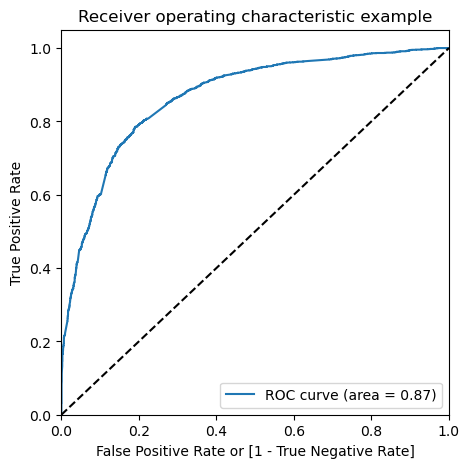

In [82]:
# Calling the ROC function
draw_roc(y_train_pd_final.Converted, y_train_pd_final.Conversion_Prob)

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [83]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pd_final[i]= y_train_pd_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pd_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.235312,0,1,1,1,0,0,0,0,0,0,0
1,0,0.638774,1,1,1,1,1,1,1,1,0,0,0
2,1,0.775377,1,1,1,1,1,1,1,1,1,0,0
3,0,0.174934,0,1,1,0,0,0,0,0,0,0,0
4,1,0.429078,0,1,1,1,1,1,0,0,0,0,0


In [84]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pd_final.Converted, y_train_pd_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.470295     1.000000     0.000000
0.1          0.1  0.563039     0.986017     0.187500
0.2          0.2  0.716780     0.938766     0.519692
0.3          0.3  0.764853     0.893443     0.650685
0.4          0.4  0.794785     0.802314     0.788099
0.5          0.5  0.793878     0.742044     0.839897
0.6          0.6  0.783220     0.680328     0.874572
0.7          0.7  0.746939     0.552555     0.919521
0.8          0.8  0.715646     0.450820     0.950771
0.9          0.9  0.653061     0.282064     0.982449


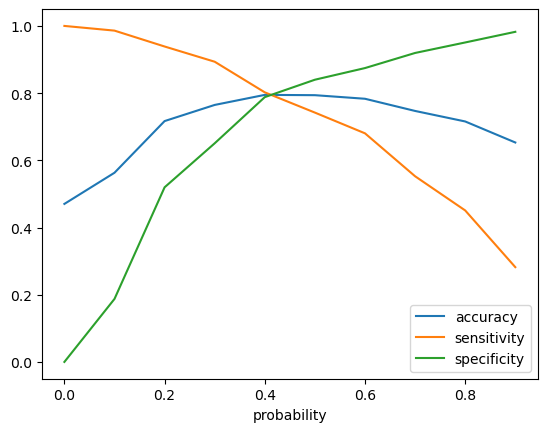

In [85]:
# Let's plot it as well
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics.

In [86]:
y_train_pd_final['final_predicted'] = y_train_pd_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pd_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.235312,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.638774,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.775377,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.174934,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.429078,0,1,1,1,1,1,0,0,0,0,0,1


In [87]:
# Let's checking the `accuracy` now
metrics.accuracy_score(y_train_pd_final.Converted, y_train_pd_final.final_predicted)

0.7959183673469388

In [88]:
# Let's create the confusion matrix once again
confusion_new = metrics.confusion_matrix(y_train_pd_final.Converted, y_train_pd_final.final_predicted )
confusion_new

array([[1871,  465],
       [ 435, 1639]], dtype=int64)

In [89]:
# Let's evaluate the other metrics as well
TP = confusion_new[1,1] 
TN = confusion_new[0,0] 
FP = confusion_new[0,1] 
FN = confusion_new[1,0] 

In [90]:
# Calculating the 'Sensitivity'
TP/(TP+FN)

0.7902603664416586

In [91]:
# Calculating the 'Specificity'
TN/(TN+FP)

0.8009417808219178

## Making Prediction on test set

In [92]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
# Making predictions on the test set and store it in the variable 'y_test_pred'
X_test = X_test[support_col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7415    0.060882
2940    0.837695
5829    0.117633
7992    0.233979
1994    0.326807
187     0.666401
2777    0.118528
741     0.234022
4350    0.161761
5754    0.349590
dtype: float64

In [94]:
# Converting y_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)

In [95]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [96]:
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [97]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [98]:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.060882
1,1,0.837695
2,0,0.117633
3,0,0.233979
4,1,0.326807


In [99]:
# Making predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.060882,0
1,1,0.837695,1
2,0,0.117633,0
3,0,0.233979,0
4,1,0.326807,0


In [100]:
# Let's checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7888888888888889

In [101]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[757, 196],
       [203, 734]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Calculating the Precision
TP/(TP+FP)

0.789247311827957

In [104]:
# Calculating Recall
TP/(TP+FN)

0.7833511205976521

## Key Insights 

- Feature Impact: The analysis revealed that leads from the Lead Add Form had a significantly higher likelihood of conversion. Furthermore, Google, Reference, and the Welingak Website emerged as top-performing sources, demonstrating high conversion rates.

- Activity-Based Engagement: Leads showing activities such as SMS Sent and Email Opened were more engaged and had a higher chance of conversion. This highlighted the importance of these activities as key indicators of lead interest.

- Specialization Significance: Certain specializations such as Business Administration, Human Resource Management, Marketing Management, Banking, Investment and Insurance, Finance, and Operation Management were identified as high-potential areas. Leads in these fields were found to be more likely to convert.

- Target Audience: Working Professionals were noted as a particularly interested demographic. Tailoring marketing efforts to this group and emphasizing the flexibility and benefits of the offerings could lead to higher enrollment rates.

## Recommendation

- Enhance Visibility of the Lead Add Form: Improve placement and accessibility to capture more high-converting leads.
- Optimize Marketing on Key Sources: Allocate resources to enhance visibility on Google, Reference, and the Welingak Website.
- Focus on High-Interest Activities: Implement targeted follow-up strategies for leads with SMS Sent and Email Opened.
- Target Hot Specializations: Customize marketing and outreach efforts for the identified high-potential specializations.
- Address Working Professionals: Develop specialized programs and highlight benefits that align with the career needs of working professionals.

## Conclusion 

The logistic regression model provided valuable insights into lead conversion factors and enabled data-driven decision-making. With an accuracy of approximately 79%, along with a precision of 78.9% and recall of 78.3% on the test set, the model demonstrated its effectiveness in classifying leads. By understanding and acting on these insights, the organization can refine its lead management strategies and improve overall conversion rates, ultimately enhancing the efficiency of its marketing efforts.